
<h1>自动化办公的相关知识点</h1>
<ol>
    <li>
        <a href = "#场景描述">场景描述</a> 
    </li>
    <li>
        <a href = "#前置知识点：递归">前置知识点：递归</a> 
    </li>
    <li>
        <a href = "#使用Python来进行文件和文件夹的判断">使用Python来进行文件和文件夹的判断</a> 
    </li>
    <li>
        <a href = "#合并数据">合并数据</a> 
    </li>
    <li>
        <a href = "#发送一个普通邮件">发送一个普通邮件</a> 
    </li>
    <li>
        <a href = "#发送一个带附件的邮件">发送一个带附件的邮件</a> 
    </li>
    <li>
        <a href = "#给多人发送邮件">给多人发送邮件</a> 
    </li>
    <li>
        <a href = "#封装发送邮件方法">封装发送邮件方法</a> 
    </li>
    <li>
        <a href = "#在正文中发送图片">在正文中发送图片</a> 
    </li>
    <li>
        <a href="#在正文中让文字更好看">在正文中让文字更好看</a>
    </li>
    <li>
        <a href="#用户行为分析">用户行为分析</a>
    </li>
</ol>

## 场景描述
- 所有刚导出的数据都在一个压缩包中，如何进行快速的数据整合和分析

## 前置知识点：递归
- 主要目的是遍历文件夹和文件
- 文件夹和文件的属性判断


In [4]:
# 函数的调用
# 一个函数调用另一个函数
def f1():
    print(1)
def f2():
    f1()
    print(2)
f2()

1
2


In [5]:
# 递归：函数调用自己
def f3(n):
    print(n)
    if n > 0:
        n -=1
        f3(n)
f3(10)

10
9
8
7
6
5
4
3
2
1
0


In [6]:
# 递归的意思是，函数自己调用自己
def f3(n):
    print(n)
    n += 1
    f3(n)
f3(1)

# 这个代码会抛出一个错误：RecursionError: maximum recursion depth exceeded in comparison
# 超出最大递归深度异常

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136


RecursionError: maximum recursion depth exceeded while calling a Python object

In [7]:
import sys
sys.setrecursionlimit(100) # 限制递归

def f3(n):
    print(n)
    n += 1
    f3(n)
f3(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


RecursionError: maximum recursion depth exceeded while calling a Python object

In [8]:
# 让递归停下来
def f(n):  
    print(n)
    n += 1
    if n == 10:
        return
    else:
        f(n)
f(1)

1
2
3
4
5
6
7
8
9


In [9]:
#  递归求和
def f(n):
    if n == 0:
        return 0
    return n + f(n-1)
f(5)

15

## 使用Python来进行文件和文件夹的判断

In [23]:
# 列出所有目标文件夹下的所有文件（文件仅包含我们平时理解的文本文件和文件夹）
import os
# 声明根目录（这个目录就是同事给到我们的那个包含所有文件的目录）
path = './data' #当前文件夹下的data
# 拿到这个文件夹下的所有文件
files = os.listdir(path)
print(files)

# 处理这些文件
for file in files:
    # 判断这些文件到底是文件夹还是文件
    # 路径拼接 
    if os.path.isfile(path + '/' + file):
        print(file + "  is a file")
        # 获取文件后，获取后缀名
        filename,extension = os.path.splitext(file)
        print('**'+filename)
        print('**'+extension)
        
        # 判断文件类型
        if extension == ".txt":
            print(filename + " is a Text file")
        
        if extension == ".xlsx":
            print(filename + "is a Excel file")  
            
        if extension == ".csv":
            print(filename + "is a CSV file")   
            
    if os.path.isdir(path + '/' + file):
        print(file + "  is a folder")
    

['study', '.DS_Store', '公司资料', '学习目标.txt']
study  is a folder
.DS_Store  is a file
**.DS_Store
**
公司资料  is a folder
学习目标.txt  is a file
**学习目标
**.txt
学习目标 is a Text file


In [22]:
import pandas as pd
# 列出所有目标文件夹下的所有文件（文件仅包含我们平时理解的文本文件和文件夹）
import os
# 声明根目录（这个目录就是同事给到我们的那个包含所有文件的目录）

def get_all_files(path):
    print(">>>>>>>一个新的递归已经开始<<<<<<<<")
    
    # 拿到这个文件夹下的所有文件
    files = os.listdir(path)
    print(files)

    # 处理这些文件
    for file in files:
        # 判断这些文件到底是文件夹还是文件
        # 路径拼接 
        if os.path.isfile(path + '/' + file):
            print(file + "  is a file")
            # 获取文件后，获取后缀名
            filename,extension = os.path.splitext(file)


            # 判断文件类型
            if extension == ".txt":
                print(filename + " is a Text file")
                data = pd.read_table(path + '/' + file)
                print(data)
                
            if extension == ".xlsx":
                print(filename + "is a Excel file")  
                data = pd.read_excel(path + '/' + file)
                print(data)
                
            if extension == ".csv":
                print(filename + "is a CSV file")   
                data = pd.read_csv(path + '/' + file)
                print(data)
        if os.path.isdir(path + '/' + file):
            print(file + "  is a folder ################")
            # 递归调用，把文件夹传入到get_all_files这个函数中，继续判断是文件还是文件夹，获取到这个文件夹下的所有内容
            get_all_files(path + '/' + file)
path = './data' #当前文件夹下的data
get_all_files(path)

>>>>>>>一个新的递归已经开始<<<<<<<<
['study', '.DS_Store', '公司资料', '学习目标.txt']
study  is a folder ################
>>>>>>>一个新的递归已经开始<<<<<<<<
['.DS_Store', '学习激励', '学习进度.txt']
.DS_Store  is a file
学习激励  is a folder ################
>>>>>>>一个新的递归已经开始<<<<<<<<
['激励2.txt', '激励1.txt']
激励2.txt  is a file
激励2 is a Text file
Empty DataFrame
Columns: [如果6个月后我把数据分析技术应用在工作中，只能奖励自己一顿大餐了]
Index: []
激励1.txt  is a file
激励1 is a Text file
Empty DataFrame
Columns: [3个月后我要把数据分析技术应用在工作中，奖励自己一次旅行]
Index: []
学习进度.txt  is a file
学习进度 is a Text file
Empty DataFrame
Columns: [我现在学习到了函数的递归调用]
Index: []
.DS_Store  is a file
公司资料  is a folder ################
>>>>>>>一个新的递归已经开始<<<<<<<<
['公司花名册.xlsx']
公司花名册.xlsx  is a file
公司花名册is a Excel file
     姓名 性别  年龄
0   潘书翠  女  17
1   弓念波  男  18
2  东方慕儿  女  19
3  上官婉儿  女  23
学习目标.txt  is a file
学习目标 is a Text file
Empty DataFrame
Columns: [来到这里学习数据分析技术，我一定要掌握它，尽快应用到工作中]
Index: []


## 合并数据

In [42]:
import pandas as pd
import os

path = './project_data'

# 声明一个空的DataFrame用来存储最终合并好的数据
final_data = pd.DataFrame()

def get_all_files(path):
    # 这里是把final_data声明成为一个全局变量，共享起来
    global final_data
    
    print(">>>>>>>这是递归新的开始<<<<<<<<<<")
    # 拿到这个文件夹下的所有文件
    files = os.listdir(path)


    # 处理这些文件
    for file in files:
        # 判断这些文件到底是文件夹还是文件
        # 路径拼接  
        if os.path.isfile(path + "/" + file):
            print(file + "是一个文件")

            # 当我们知道这是一个文件的时候，我们就要判断到底是个什么类型的文件
            filename,extension = os.path.splitext(file)

            if extension == ".csv":

                # 获取文件内容，然后把内容合并到final_data当中
                file_data = pd.read_csv(path+"/" +file)
                # 开始合并数据     ignore_index这个参数的意思是重新排列索引，不用文件中自带的索引
                final_data = final_data.append(file_data,ignore_index=True)
                print(file + ".......合并中")
                

        if os.path.isdir(path + "/" + file):
            print("::::::::::"+file + "是一个文件夹::::::::::")
            # 递归调用，把文件夹传入到get_all_files这个函数中，继续判断是文件还是文件夹，获取到这个文件夹下的所有内容
            get_all_files(path + "/" + file)
get_all_files(path)
print('数据合并完成')

>>>>>>>这是递归新的开始<<<<<<<<<<
.DS_Store是一个文件
::::::::::part2_data是一个文件夹::::::::::
>>>>>>>这是递归新的开始<<<<<<<<<<
data6.csv是一个文件
data6.csv.......合并中
data7.csv是一个文件
data7.csv.......合并中
data9.csv是一个文件
data9.csv.......合并中
data8.csv是一个文件
data8.csv.......合并中
data10.csv是一个文件
data10.csv.......合并中
::::::::::part1_data是一个文件夹::::::::::
>>>>>>>这是递归新的开始<<<<<<<<<<
data3.csv是一个文件
data3.csv.......合并中
data2.csv是一个文件
data2.csv.......合并中
data1.csv是一个文件
data1.csv.......合并中
data5.csv是一个文件
data5.csv.......合并中
data4.csv是一个文件
data4.csv.......合并中
data12.csv是一个文件
data12.csv.......合并中
data13.csv是一个文件
data13.csv.......合并中
data11.csv是一个文件
data11.csv.......合并中
数据合并完成


In [44]:
final_data.index

RangeIndex(start=0, stop=12256906, step=1)

In [45]:
# 删除无用列
final_data.drop(['Unnamed: 0'], axis = 1,inplace = True)
final_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,79243315,169375972,1,NaN,10271,2014-12-09 02
1,15541192,349695282,1,NaN,12189,2014-11-28 15
2,108369002,173086447,1,NaN,9261,2014-11-26 09
3,11431275,239472167,1,NaN,6513,2014-11-27 20
4,18883390,152291811,1,NaN,8877,2014-12-17 17


## 发送一个普通邮件

In [47]:
# 授权码，其实也可以理解成是另外一种密码
passwd = "WZOIIVSUVPNUTFYI"

In [51]:
import smtplib
from email.mime.text import MIMEText
email_name = "xhy991127@163.com" #发送者的邮箱

msg_to = "xhy991127@163.com" # 接收方的邮箱

# 邮件的正文内容
content = "测试自动化发送邮件"

# 获取到了一个设置邮件的对象
msg = MIMEText(content)

# 设置主题
msg['Subject'] = 'Python发送邮件测试'
# 显示邮件来自于谁
msg['From'] = 'Hazley XU'

# 再设置要发送给谁
msg['To'] = msg_to

# 执行发送过程
# 配置服务器
s = smtplib.SMTP_SSL('smtp.163.com',465)
s.login(email_name,passwd)

# 执行发送
s.sendmail(email_name,msg_to,msg.as_string())

# 执行退出
s.quit()

(221, b'Bye')

## 发送一个带附件的邮件

In [59]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

email_name = "xhy991127@163.com" #发送者的邮箱

msg_to = "xhy991127@163.com" # 接收方的邮箱

# 邮件的正文内容
content = "测试自动化发送邮件"

# 获取到了一个设置邮件的对象
msg = MIMEMultipart()
part1 = MIMEText(content)
msg.attach(part1)

# 设置主题
msg['Subject'] = 'Python发送邮件测试'
# 显示邮件来自于谁
msg['From'] = 'Hazley XU'

# 再设置要发送给谁
msg['To'] = msg_to

# 加附件
# 1.文本类型的附件
att1 = MIMEText(open('./data/学习目标.txt','rb').read(),'plain','urf-8')
att1['Content-Type'] = 'application/octet-stream'
# 注意这里的filename就是我们发送邮件时候，要显示的那个名字，可以任意写
att1.add_header('Content-Disposition','attachment',filename = ('gbk','','我的学习目标.txt'))
msg.attach(att1)

# 2.图片类型的附件

att2 = MIMEText(open('评论.png','rb').read(),'plain','urf-8')
att2['Content-Type'] = 'application/octet-stream'
# 注意这里的filename就是我们发送邮件时候，要显示的那个名字，可以任意写
att2.add_header('Content-Disposition','attachment',filename = ('gbk','','词云图.png'))
msg.attach(att2)

# 3.其他格式的附件
att3 = MIMEText(open('自动化办公.ipynb','rb').read(),'plain','urf-8')
att3['Content-Type'] = 'application/octet-stream'
# 注意这里的filename就是我们发送邮件时候，要显示的那个名字，可以任意写
att3.add_header('Content-Disposition','attachment',filename = ('gbk','','自动化办公.ipynb'))
msg.attach(att3)

# 执行发送过程
# 配置服务器
s = smtplib.SMTP_SSL('smtp.163.com',465)
s.login(email_name,passwd)

# 执行发送
s.sendmail(email_name,msg_to,msg.as_string())

# 执行退出
s.quit()

(221, b'Bye')

## 给多人发送邮件

In [62]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
#发送者的邮箱
email_name = "xhy991127@163.com" 
# 接收方的邮箱
msg_to = ["xhy991127@163.com","1023493590@qq.com"] 
# 抄送方的邮箱
acc_to = ["xhy991127@163.com"] 



# 邮件的正文内容
content = "测试自动化发送邮件"

# 获取到了一个设置邮件的对象
msg = MIMEMultipart()
part1 = MIMEText(content)
msg.attach(part1)

# 设置主题
msg['Subject'] = 'Python发送邮件测试'
# 显示邮件来自于谁
msg['From'] = 'Hazley XU'

# 再设置要发送给谁
msg['To'] = ';'.join(msg_to)

# 设置抄送给谁
msg['Cc'] = ';'.join(acc_to)

# 加附件
# 1.文本类型的附件
att1 = MIMEText(open('./data/学习目标.txt','rb').read(),'plain','urf-8')
att1['Content-Type'] = 'application/octet-stream'
# 注意这里的filename就是我们发送邮件时候，要显示的那个名字，可以任意写
att1.add_header('Content-Disposition','attachment',filename = ('gbk','','我的学习目标.txt'))
msg.attach(att1)

# 2.图片类型的附件

att2 = MIMEText(open('评论.png','rb').read(),'plain','urf-8')
att2['Content-Type'] = 'application/octet-stream'
# 注意这里的filename就是我们发送邮件时候，要显示的那个名字，可以任意写
att2.add_header('Content-Disposition','attachment',filename = ('gbk','','词云图.png'))
msg.attach(att2)

# 3.其他格式的附件
att3 = MIMEText(open('自动化办公.ipynb','rb').read(),'plain','urf-8')
att3['Content-Type'] = 'application/octet-stream'
# 注意这里的filename就是我们发送邮件时候，要显示的那个名字，可以任意写
att3.add_header('Content-Disposition','attachment',filename = ('gbk','','自动化办公.ipynb'))
msg.attach(att3)

# 执行发送过程
# 配置服务器
s = smtplib.SMTP_SSL('smtp.163.com',465)
s.login(email_name,passwd)

# 执行发送
s.sendmail(email_name,msg_to+acc_to,msg.as_string())

# 执行退出
s.quit()

(221, b'Bye')

## 封装发送邮件方法

In [73]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage

def send_email(email_name:str,
              passwd:str,
              msg_to:str,
              subject:str,
              content:str,
              image_html:bool=False,
              image_path:dict=None,
              acc_to:list = None,
              att_file:list = None,
              from_name:str = None)->bool:
    """
    发送邮件方法
    :param email_name:发送者邮件地址
    :param passwd:发送者邮箱密码
    :param msg_to:收件人地址列表，参数类型是列表
    :param subject:邮件标题，字符串类型
    :param content:邮件的文本内容，字符串类型
    :param acc_to:抄送人地址列表，参数类型是列表，默认为空
    :param att_file:附件列表，参数类型是列表，默认为空
    :param from_name: 显示发件人的名字，字符串类型，默认为空
    
    :param image_html:布尔值，默认为False，如果为True则包含图片，是HTML格式的正文内容
    :param image_path:图片路径，字典类型{"图片id":"图片路径"}，默认为空，这个参数只有在image_html为True的时候才生效
    
    :return bool:成功返回为True，失败返回False 
    
    """
    # 获取到了一个设置邮件的对象
    msg = MIMEMultipart()
    part1 = MIMEText(content)
    msg.attach(part1)

    # 设置主题
    msg['Subject'] = subject
    # 显示邮件来自于谁
    msg['From'] = from_name

    # 再设置要发送给谁
    msg['To'] = ';'.join(msg_to)

    # 设置抄送给谁
    msg['Cc'] = ';'.join(acc_to)

    # 加附件
    
    # 判断是否有附件：
    if len(att_file)>0:
        for file in att_file:
            print(file)

            att= MIMEText(open(file,'rb').read(),'plain','urf-8')
            att['Content-Type'] = 'application/octet-stream'
            
            # 获取文件名字
            file_name_list = file.split('/')
            # 获取最后文件的长度，计算后得到最后一个元素的角标(索引)的数字
            file_num = len(file.split('/'))-1
            file_name = file_name_list[file_num]
            
            att.add_header('Content-Disposition','attachment',filename = ('gbk','',file_name))
            msg.attach(att)


    # 执行发送过程,判断是否发送成功
    # 配置服务器
    try:
        s = smtplib.SMTP_SSL('smtp.163.com',465)
        s.login(email_name,passwd)

        # 执行发送
        s.sendmail(email_name,msg_to+acc_to,msg.as_string())
        
        return True
    except s.SMTPException:
        print('发送失败')
    finally:
        # 执行退出
        s.quit()


In [74]:
#发送者的邮箱
email_name = "xhy991127@163.com" 
# 接收方的邮箱
msg_to = ["xhy991127@163.com","1023493590@qq.com"] 
# 抄送方的邮箱
acc_to = ["xhy991127@163.com"] 

# 邮件的正文内容
content = "测试自动化发送邮件是否成功"
subject = "自动化发送邮件"
from_name = "Hazley XU"

# 添加附件
att_file = ['./data/学习目标.txt','评论.png','自动化办公.ipynb']

send_email(email_name=email_name,
           passwd=passwd,
          msg_to=msg_to,
          acc_to=acc_to,
          content=content,
#            image_html=True,
#            image_path=image_path,
          subject=subject,
          from_name=from_name,
          att_file=att_file)

./data/学习目标.txt
评论.png
自动化办公.ipynb


True

## 在正文中发送图片

In [82]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage

def send_email(email_name:str,
              passwd:str,
              msg_to:str,
              subject:str,
              content:str,
              image_html:bool=False,
              image_path:dict=None,
              acc_to:list = None,
              att_file:list = None,
              from_name:str = None)->bool:
    """
    发送邮件方法
    :param email_name:发送者邮件地址
    :param passwd:发送者邮箱密码
    :param msg_to:收件人地址列表，参数类型是列表
    :param subject:邮件标题，字符串类型
    :param content:邮件的文本内容，字符串类型
    :param acc_to:抄送人地址列表，参数类型是列表，默认为空
    :param att_file:附件列表，参数类型是列表，默认为空
    :param from_name: 显示发件人的名字，字符串类型，默认为空
    
    :param image_html:布尔值，默认为False，如果为True则包含图片，是HTML格式的正文内容
    :param image_path:图片路径，字典类型{"图片id":"图片路径"}，默认为空，这个参数只有在image_html为True的时候才生效
    
    :return bool:成功返回为True，失败返回False 
    
    """
    # 获取到了一个设置邮件的对象
    msg = MIMEMultipart()
    part1 = MIMEText(content)
    msg.attach(part1)

    # 设置主题
    msg['Subject'] = subject
    # 显示邮件来自于谁
    msg['From'] = from_name

    # 再设置要发送给谁
    msg['To'] = ';'.join(msg_to)

    # 设置抄送给谁
    msg['Cc'] = ';'.join(acc_to)

    # 加附件
    
    # 判断是否有附件：
    if len(att_file)>0:
        for file in att_file:
            print(file)

            att= MIMEText(open(file,'rb').read(),'plain','utf-8')
            att['Content-Type'] = 'application/octet-stream'
            
            # 获取文件名字
            file_name_list = file.split('/')
            # 获取最后文件的长度，计算后得到最后一个元素的角标(索引)的数字
            file_num = len(file.split('/'))-1
            file_name = file_name_list[file_num]
            
            att.add_header('Content-Disposition','attachment',filename = ('gbk','',file_name))
            msg.attach(att)
            
    # 判断是否是html格式，然后对图片内容进行挂载
    if image_html:
        msg.attach(MIMEText(content,"html","utf-8"))
        for image_id,image_path in image_path.items():
            file = open(image_path,'rb')
            img_data = file.read()
            file.close()
            img = MIMEImage(img_data)
            img.add_header("Content-ID",image_id)
            msg.attach(img)
    else:
        msg.attach(MIMEText(content))

    # 执行发送过程,判断是否发送成功
    # 配置服务器
    try:
        s = smtplib.SMTP_SSL('smtp.163.com',465)
        s.login(email_name,passwd)

        # 执行发送
        s.sendmail(email_name,msg_to+acc_to,msg.as_string())
        
        return True
    except s.SMTPException:
        print('发送失败')
    finally:
        # 执行退出
        s.quit()

In [83]:

# 邮件的正文内容
content = """

<html>
    <body>
        <h1>数据分析报告</h1>
        <img src='cid:imageid' alt='imageid'>
        <br>
        <img src='cid:imageid1' alt='imageid1'>
    </body>
</html>

"""

image_path={'imageid':'评论.png',
           'imageid1':'评论1.png'}

#发送者的邮箱
email_name = "xhy991127@163.com" 
# 接收方的邮箱
msg_to = ["xhy991127@163.com","1023493590@qq.com"] 
# 抄送方的邮箱
acc_to = ["xhy991127@163.com"] 

subject = "自动化发送邮件"
from_name = "Hazley XU"

# 添加附件
att_file = ['./data/学习目标.txt','评论.png','自动化办公.ipynb']

send_email(email_name=email_name,
           passwd=passwd,
          msg_to=msg_to,
          acc_to=acc_to,
          content=content,
          image_html=True,
          image_path=image_path,
          subject=subject,
          from_name=from_name,
          att_file=att_file)

./data/学习目标.txt
评论.png
自动化办公.ipynb


True

## 在正文中让文字更好看

In [84]:

# 邮件的正文内容
content = """

<html>
    <body>
        <h1>用户行为分析报告</h1>
        <ol>
            <li>项目背景</li>
            <p>流量费用日益增长，为帮助公司发挥现有用户的最大价值，分析各环节用户流失情况，故此进行此次分析</p>
            <img src='cid:imageid' alt='imageid'>
            <li>分析过程</li>
            <p>此次使用某电商平台的用户数据，共计1200万用户行为数据，数据介绍如下</p>
            <table border='1'>
                <tr>
                    <th>字段名称</th>
                    <th>字段说明</th>
                </tr>
                <tr>
                    <th>user_id</th>
                    <th>用户ID</th>
                </tr>
                <tr>
                    <th>item_id</th>
                    <th>商品ID</th>
                </tr>
                <tr>
                    <th>behavior_type</th>
                    <th>用户行为类型(包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示)</th>
                </tr>
                <tr>
                    <th>user_geohash</th>
                    <th>用户地理位置</th>
                </tr>
                <tr>
                    <th>item_category</th>
                    <th>品类ID</th>
                </tr>
                <tr>
                    <th>time</th>
                    <th>用户行为发生时间</th>
                </tr>
            </table>
            <li>分析结论</li>
            <p>重要价值用户占比20%，我们应该采用***策略</p>
        </ol>
        
        <br>

    </body>
</html>

"""

image_path={'imageid':'评论.png',
           'imageid1':'评论1.png'}

#发送者的邮箱
email_name = "xhy991127@163.com" 
# 接收方的邮箱
msg_to = ["xhy991127@163.com","1023493590@qq.com"] 
# 抄送方的邮箱
acc_to = ["xhy991127@163.com"] 

subject = "自动化发送邮件"
from_name = "Hazley XU"

# 添加附件
att_file = ['./data/学习目标.txt','评论.png','自动化办公.ipynb']

send_email(email_name=email_name,
           passwd=passwd,
          msg_to=msg_to,
          acc_to=acc_to,
          content=content,
          image_html=True,
          image_path=image_path,
          subject=subject,
          from_name=from_name,
          att_file=att_file)

./data/学习目标.txt
评论.png
自动化办公.ipynb


True

## 用户行为分析实战

In [94]:
data = final_data[['user_id','item_id','behavior_type','time']]
data.head()

,user_id,item_id,behavior_type,time
0,79243315,169375972,1,2014-12-09 02
1,15541192,349695282,1,2014-11-28 15
2,108369002,173086447,1,2014-11-26 09
3,11431275,239472167,1,2014-11-27 20
4,18883390,152291811,1,2014-12-17 17


- apply()是一种让函数作用域列或者是行的操作
- applymap()是一种让函数作用域DataFrame每一个元素的操作
- map是一种让函数作用域Series每一个元素的操作

In [95]:
data['date'] = data['time'].map(lambda x : x.split(' ')[0])
data['hour'] = data['time'].map(lambda x : x.split(' ')[1])
data.head()

<ipython-input-95-e6a1c4a067d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['time'].map(lambda x : x.split(' ')[0])


,user_id,item_id,behavior_type,time,date,hour
0,79243315,169375972,1,2014-12-09 02,2014-12-09,02
1,15541192,349695282,1,2014-11-28 15,2014-11-28,15
2,108369002,173086447,1,2014-11-26 09,2014-11-26,09
3,11431275,239472167,1,2014-11-27 20,2014-11-27,20
4,18883390,152291811,1,2014-12-17 17,2014-12-17,17


In [96]:
data.drop(['time'],axis=1,inplace=True)
data.head()

,user_id,item_id,behavior_type,date,hour
0,79243315,169375972,1,2014-12-09,02
1,15541192,349695282,1,2014-11-28,15
2,108369002,173086447,1,2014-11-26,09
3,11431275,239472167,1,2014-11-27,20
4,18883390,152291811,1,2014-12-17,17


In [97]:
data.shape

(12256906, 5)

In [98]:
data.dtypes

user_id           int64
item_id           int64
behavior_type     int64
date             object
hour             object
dtype: object

In [100]:
# 转换时间数据类型
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['hour'].astype('int32')
data.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
date             datetime64[ns]
hour                      int32
dtype: object

In [102]:
# 查看一共有多少用户
data['user_id'].nunique()

10000

In [103]:
# 查看是否有缺失值
data.isnull().sum()

user_id          0
item_id          0
behavior_type    0
date             0
hour             0
dtype: int64

### 流量指标分析
- 流量指标：指用户在该网站操作的每一个步骤记录的量化指标
- 包括浏览量PV
- 独立访客数uv


- 针对每一个访客又可以用以下指标衡量访客质量，包括：
- 1、平均在线时间，平均每个UV访问页面停留的时间长度
- 2、平均访问深度，平均每一个UV的pv数量
- 3、跳失率，浏览某个页面后就离开的访问次数/该页面的全部访问次数

In [105]:
# 总pv值
data.shape[0]

12256906

In [114]:
import matplotlib.pyplot as plt

# 日均pv
pv = data.groupby(['date'])['user_id'].count().reset_index().rename(columns = {'user_id':"pv"})
pv

,date,pv
0,2014-11-18,366701
1,2014-11-19,358823
2,2014-11-20,353429
3,2014-11-21,333104
4,2014-11-22,361355
5,2014-11-23,382702
6,2014-11-24,378342
7,2014-11-25,370239
8,2014-11-26,360896
9,2014-11-27,371384


In [115]:
# 日均uv
uv = data.groupby(['date'])['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns = {'user_id':"uv"})
uv

,date,uv
0,2014-11-18,6343
1,2014-11-19,6420
2,2014-11-20,6333
3,2014-11-21,6276
4,2014-11-22,6187
5,2014-11-23,6373
6,2014-11-24,6513
7,2014-11-25,6351
8,2014-11-26,6357
9,2014-11-27,6359


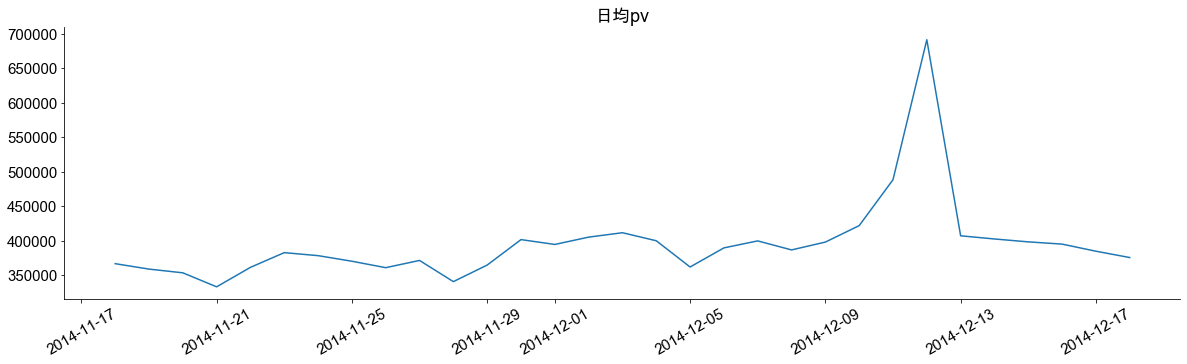

In [118]:
font = {'family':'Arial Unicode MS','size':15}
plt.rc('font',**font)

plt.figure(figsize = (20,5))
plt.plot(pv['date'],pv['pv'])
plt.xticks(rotation=30)
plt.title('日均pv')

gca = plt.gca()
gca.spines['right'].set_color('none')
gca.spines['top'].set_color('none')
# 保存图片
plt.savefig('日pv.png')
plt.show()

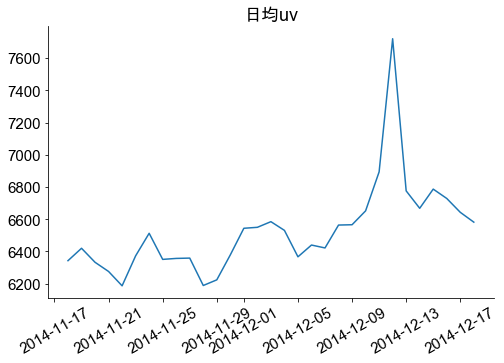

In [122]:
font = {'family':'Arial Unicode MS','size':15}
plt.rc('font',**font)

plt.figure(figsize = (8,5))
plt.plot(uv['date'],uv['uv'])
plt.xticks(rotation=30)
plt.title('日均uv')

gca = plt.gca()
gca.spines['right'].set_color('none')
gca.spines['top'].set_color('none')
# 保存图片
plt.savefig('日uv.png')
plt.show()

- pv和uv都在双十二达到了高峰
- pv和uv在11.17号到12月7号流量都是比较平稳的，只有在双十二前后两天波动较大

In [123]:
## 每一个时刻的pv和UV的值
pv_hour = data.groupby(['hour'])['user_id'].count().reset_index().rename(columns={'user_id':"pv"})
uv_hour = data.groupby(['hour'])['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':"uv"})

In [124]:
pv_hour

,hour,pv
0,0,517404
1,1,267682
2,2,147090
3,3,98516
4,4,80487
5,5,88296
6,6,158798
7,7,287337
8,8,396106
9,9,485951


In [125]:
uv_hour

,hour,uv
0,0,5786
1,1,3780
2,2,2532
3,3,1937
4,4,1765
5,5,2030
6,6,3564
7,7,5722
8,8,7108
9,9,7734


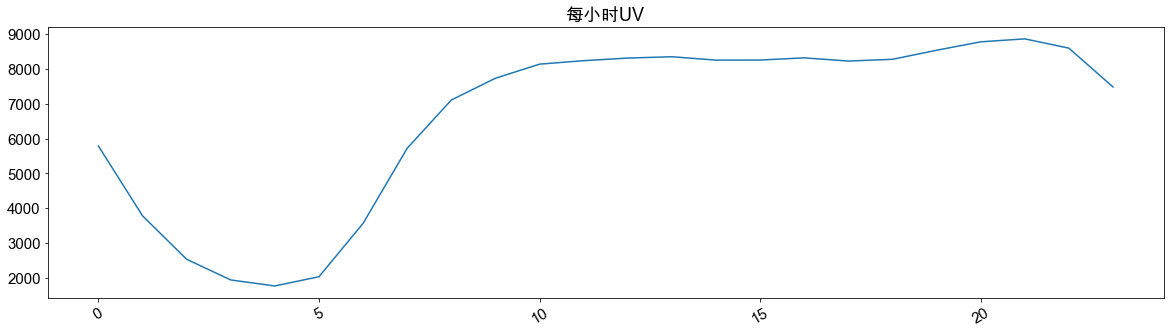

In [126]:
plt.figure(figsize=(20,5))
plt.plot(uv_hour['hour'],uv_hour['uv'])

plt.xticks(rotation=30)
plt.title('每小时UV')

# 保存图片
plt.savefig('每小时UV.png')

plt.show()

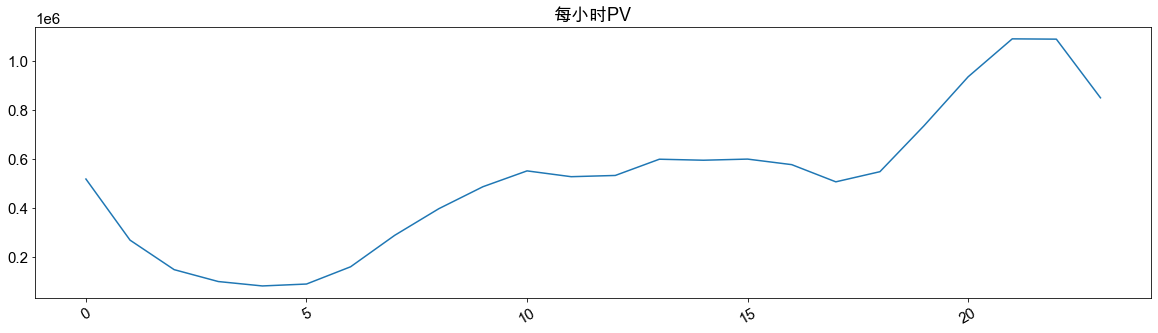

In [127]:
plt.figure(figsize=(20,5))
plt.plot(pv_hour['hour'],pv_hour['pv'])

plt.xticks(rotation=30)
plt.title('每小时PV')

# 保存图片
plt.savefig('每小时PV.png')

plt.show()

In [131]:
# 求每个UV平均访问深度
round(data['user_id'].shape[0]/data['user_id'].nunique(),2)

1225.69

In [132]:
# 求每个UV日均访问深度
round(data['user_id'].shape[0]/data['user_id'].nunique()/data['date'].nunique(),2)

39.54

- 每个UV的平均PV数是1225.69
- 每个UV的每日平均PV数是39.54

## 知识点预告：可视化 pyecharts

In [137]:
# 漏斗模型
# 计算每一个环节用户的访问量
view = data.groupby(['behavior_type'])['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
view

,behavior_type,pv
0,1,11550581
1,2,242556
2,3,343564
3,4,120205


In [139]:
!pip install pyecharts

     |████████████████████████████████| 135 kB 976 kB/s eta 0:00:01
     |████████████████████████████████| 74 kB 168 kB/s eta 0:00:01


In [142]:
from pyecharts.charts import Funnel
attr = ['点击','收藏','加购物车','支付']
image_data = [(attr[i],int(view['pv'][i])) for i in range(len(attr))]
image_data

[('点击', 11550581), ('收藏', 242556), ('加购物车', 343564), ('支付', 120205)]

In [146]:
# 绘图
funnel = (Funnel().add(series_name="用户行为漏斗",data_pair=image_data))
funnel.render_notebook()